In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
from scipy.optimize import curve_fit
import pandas as pd

# Define the Logistic function
def func(t, M, x0, k, offset):
    return M / (1 + np.e**(-k * (t - x0))) + offset

# Check this to read comma separated values
M3_data = pd.read_csv("housing.csv", dtype={'year': np.int64})
# print out first 5 rows of the data
print(M3_data.head())

# Get the data
t_data = M3_data.index
housing_data = M3_data['Units'].values
print(housing_data)
index_data = np.linspace(0, len(M3_data)-1, len(M3_data))

index_data = np.linspace(0, 180, 19)
housing_data = np.linspace(0, 180, 19)

print(index_data)
for i in index_data:
    j = int(i)
    housing_data[j//10] = M3_data['Units'].values[j]



       Months        Units
0  2010-01-01  250488.5066
1  2010-02-01  250824.7751
2  2010-03-01  251160.4147
3  2010-04-01  251389.5761
4  2010-05-01  251557.9777
[250488.5066 250824.7751 251160.4147 251389.5761 251557.9777 251864.5555
 252014.7216 252218.5368 252335.7565 252496.3921 252622.4971 252750.3288
 252852.4167 253007.363  253276.8871 253403.184  253551.4589 253664.4317
 253824.2534 253968.0154 254233.4422 254406.3218 254805.8868 254997.7977
 255227.5091 255439.7112 255625.9444 255877.3933 256115.3895 256713.9538
 256920.0535 257263.1201 257481.5792 257775.641  258082.1088 258444.9369
 258805.1941 259012.6174 259244.5384 259518.2141 259765.8806 260018.6071
 260296.6385 260586.0758 260940.7358 261363.6153 261724.9827 261857.218
 262210.1353 262548.1959 262898.5    263190.1111 263453.3468 263702.7722
 263946.0063 264160.6446 264386.6093 264572.7411 264771.4424 265045.1938
 265310.7451 265578.1454 266380.2515 266628.6145 267124.4814 267436.6444
 267732.0035 267962.4728 268196.7344

[3.17575316e+04 5.01073073e+01 1.00000000e+01 2.54806076e+05]


/var/folders/mv/xctlzsxn7fx0m9jsry_r43tc0000gn/T/ipykernel_53970/3201449684.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, index_data, housing_data, p0=[500000, 50, 10, 27000])


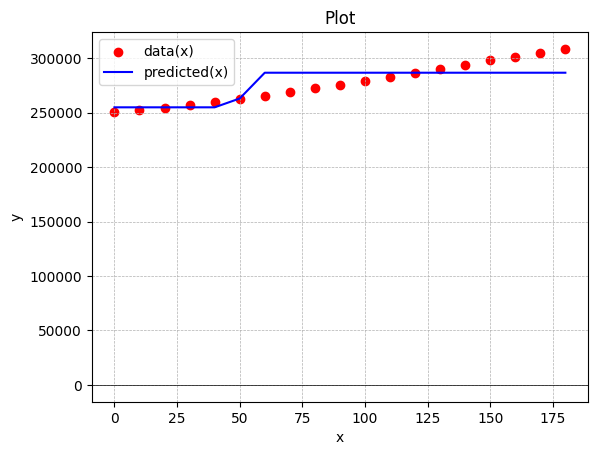

In [44]:
popt, pcov = curve_fit(func, index_data, housing_data, p0=[500000, 50, 10, 27000])

print(popt)


predicted_list = func(index_data, popt[0], popt[1], popt[2], popt[3])

plt.scatter(index_data, housing_data, label='data(x)', color='red')
plt.plot(index_data, predicted_list, label='predicted(x)', color='blue')

plt.axhline(0, color='black', linewidth=0.5)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()



In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import io

print(index_data, housing_data)

# Logistic Regression Model
model = LogisticRegression()
model.fit(index_data, housing_data)

print(model)




[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180.] [250488.5066 252622.4971 254233.4422 256920.0535 259765.8806 262898.5
 265310.7451 268623.1249 272266.2632 275342.2718 278845.3411 282364.7087
 285880.6606 289689.8315 294098.3984 298317.9046 301094.7198 305084.6807
 308408.2488]


ValueError: Expected 2D array, got 1D array instead:
array=[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

212686527.554837
[4116105.34186839]
4116105.3418684006

y = 4116105.34 * x + 212686527.55
R^2 = 0.8995183499136986


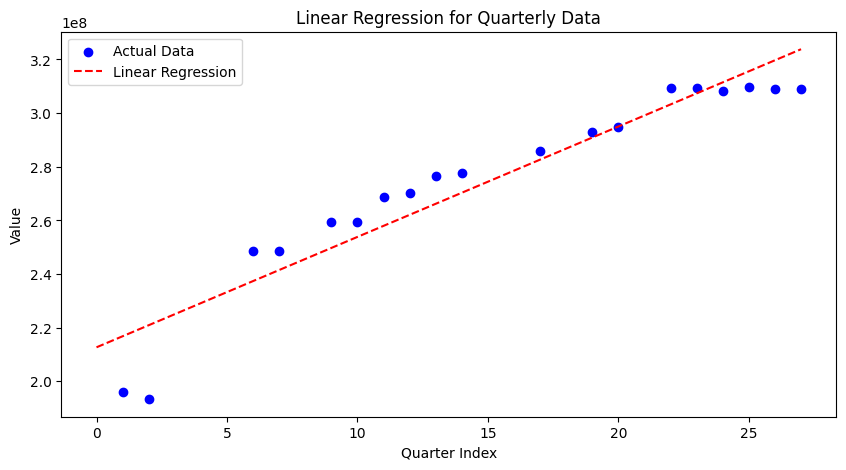

In [ ]:
# Re-import necessary libraries due to execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create DataFrame with the given data
quarters = [
    "2018 Q1", "2018 Q2", "2018 Q3", "2018 Q4",
    "2019 Q1", "2019 Q2", "2019 Q3", "2019 Q4",
    "2020 Q1", "2020 Q2", "2020 Q3", "2020 Q4",
    "2021 Q1", "2021 Q2", "2021 Q3", "2021 Q4",
    "2022 Q1", "2022 Q2", "2022 Q3", "2022 Q4",
    "2023 Q1", "2023 Q2", "2023 Q3", "2023 Q4",
    "2024 Q1", "2024 Q2", "2024 Q3", "2024 Q4"
]

values = [
    None, 195885865, 193328576, None,
    None, None, 248613396, 248613396,
    None, 259382694, 259482879, 268705617,
    270103832, 276455826, 277780290, None,
    None, 285923259, None, 292797634,
    294783483, None, 309389709, 309389709,
    308238260, 309619875, 309170883, 308817179
]

df_quarters = pd.DataFrame({"Quarter": quarters, "Value": values})

# Convert quarter to numerical format (indexing from 0)
df_quarters["Quarter_Index"] = np.arange(len(df_quarters))

# Remove rows with missing values
df_clean = df_quarters.dropna()

# Prepare data for regression
X = df_clean[["index"]]
y = df_clean["Value"]

# Fit Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X, y)
print(linear_model.intercept_)
print(linear_model.coef_)


# Predict values for all quarters
df_quarters["Predicted_Value"] = linear_model.predict(df_quarters[["Quarter_Index"]])
slope = df_quarters["Predicted_Value"][1] - df_quarters["Predicted_Value"][0]
print(slope)

# Get the equation of the linear regression model
slope = linear_model.coef_[0]
intercept = linear_model.intercept_

# Compute R^2 score
r_squared = linear_model.score(X, y)

# Output equation and R^2 value
equation = f"y = {slope:.2f} * x + {intercept:.2f}"
r_squared
print("")
print(equation)
print("R^2 = " + str(r_squared))

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(df_clean["Quarter_Index"], df_clean["Value"], color='blue', label="Actual Data")
plt.plot(df_quarters["Quarter_Index"], df_quarters["Predicted_Value"], color='red', linestyle='--', label="Linear Regression")
plt.xlabel("Quarter Index")
plt.ylabel("Value")
plt.title("Linear Regression for Quarterly Data")
plt.legend()
plt.show()

# Display the predicted data


In [ ]:
# Re-import necessary libraries due to execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create DataFrame with the given data
quarters = [
    "2018 Q1", "2018 Q2", "2018 Q3", "2018 Q4",
    "2019 Q1", "2019 Q2", "2019 Q3", "2019 Q4",
    "2020 Q1", "2020 Q2", "2020 Q3", "2020 Q4",
    "2021 Q1", "2021 Q2", "2021 Q3", "2021 Q4",
    "2022 Q1", "2022 Q2", "2022 Q3", "2022 Q4",
    "2023 Q1", "2023 Q2", "2023 Q3", "2023 Q4",
    "2024 Q1", "2024 Q2", "2024 Q3", "2024 Q4"
]



df_quarters = pd.read_csv("Andrew.csv")
df_shop = df_quarters.drop(columns="office_sf_inventory")

df_quarters = pd.DataFrame({"Quarter": quarters, "Value": values})

# Convert quarter to numerical format (indexing from 0)
df_quarters["Quarter_Index"] = np.arange(len(df_quarters))

# df_quarters = pd.read_csv("Andrew.csv")
# df_office = df_quarters.drop(columns="shopping_center_sf")

# Convert quarter to numerical format (indexing from 0)

# Remove rows with missing values
df_clean = df_shop.dropna()

# Prepare data for regression
X = df_clean[["index"]]
y = df_clean["shopping_center_sf"]

# Fit Linear Regression Model
linear_model1 = LinearRegression()
linear_model1.fit(X, y)
print(linear_model.intercept_)
print(linear_model.coef_)


# Predict values for all quarters
df_quarters["Predicted_Value"] = linear_model.predict(df_quarters[["index"]])

slope = df_quarters["Predicted_Value"][1] - df_quarters["Predicted_Value"][0]
print(slope)

# Get the equation of the linear regression model
slope = linear_model.coef_[0]
intercept = linear_model.intercept_

# Compute R^2 score
r_squared = linear_model.score(X, y)

# Output equation and R^2 value
equation = f"y = {slope:.2f} * x + {intercept:.2f}"
r_squared
print("")
print(equation)
print("R^2 = " + str(r_squared))

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(df_clean["index"], df_clean["shopping_center_sf"], color='blue', label="Actual Data")
plt.plot(df_quarters["index"], df_quarters["Predicted_Value"], color='red', linestyle='--', label="Linear Regression")
plt.xlabel("Index")
plt.ylabel("shopping_center_sf")
plt.title("Linear Regression for Quarterly Data")
plt.legend()
plt.show()

# Display the predicted data


   index  shopping_center_sf
1      1          38551410.0
2      2          38478677.0
7      7          38161250.0
8      8          37729360.0
9      9          37662985.0
212686527.554837
[4116105.34186839]


KeyError: "None of [Index(['index'], dtype='object')] are in the [columns]"